In [1]:
# https://teddykoker.com/2019/04/backtesting-portfolios-of-leveraged-etfs-in-python-with-backtrader/


import numpy as np

weight = np.array([0.2,0.3])
name = ['ETH','BTC']

new_dict =[{'symbol': name[i], 'weight': weight[i]} for i in range(len(weight))]
# new_dict =[{ name[i] : weight[i]} for i in range(len(weight))]

# rebalance_dict ={token_name_lst[i]:percent_rebalance[i] for i in range(len(token_name_lst))}
# new_dict[0]['symbol'] 
for i in range(len(new_dict)):
    if new_dict[i]['symbol'] =='ETH':
        print(new_dict[i])

{'symbol': 'ETH', 'weight': 0.2}


In [1]:
def min_index_data(symbol):

    ts_first_index = []
    ### Clean missing values ####
    for symbol in symbols:
        ts =ex.fetch_ohlcv(symbol,'1d')[0][0]# timestamp
        ### compare index 
        ts_first_index.append(ts)
        ### Filter by max [timestamp,x,x,] ### 
    ts_loc = np.array(ts_first_index).max() 
    return ts_loc

In [2]:
ts_first =  min_index_data('ETH/USD')
print('Date times Starts :',ex.iso8601(int(ts_first)))

NameError: name 'symbols' is not defined

In [3]:
import ccxt 
import numpy as np
from tqdm import tqdm
### Setting ###
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
%matplotlib inline

ex =ccxt.ftx()

market_name = ex.load_markets().keys()
symbols_list = list(market_name)
symbol_lists = []
# symbol_lists = [sym for sym in symbol_lists if 'PERP' in sym]
for i in (range(len(symbols_list))):
#                if ('USD' in symbols_list[i]) & ('USDT' not in symbols_list[i]) :
                 if ('PERP' in symbols_list[i]):
                   symbol_lists.append(symbols_list[i])
            
            
            
# symbol_lists = symbol_lists[:10]
symbol_lists[:10]

['1INCH-PERP',
 'AAVE-PERP',
 'ADA-PERP',
 'AGLD-PERP',
 'ALCX-PERP',
 'ALGO-PERP',
 'ALICE-PERP',
 'ALPHA-PERP',
 'ALT-PERP',
 'AMPL-PERP']

In [4]:

# symbol_lists = ['ETH/USD','BTC/USD','XRP/USD','SOL/USD','LUNA-PERP','AVAX-PERP','ADA-PERP','DOT-PERP','XLM-PERP','MATIC/USD']

colmuns_ohlc = ('dates','open','high','low','close','volume')
OHLC_DICT =dict()
list_name = []

limit_bar= 350
start_date = dt(2020,6,1)

# Loop  get data  all perpetual price on ftx
for symbol in tqdm(symbol_lists):
    df = pd.DataFrame(ex.fetch_ohlcv(symbol,'1d',since=int(start_date.timestamp()*1000)) , columns=colmuns_ohlc)
    df['dates'] = df['dates'].apply(ex.iso8601)

    df.set_index('dates',inplace=True)
    # Request get over 300 bars
    if len(df)>= limit_bar:
        list_name.append(symbol)
        date_range = df.index
    #     data[symbol+' index'] = df['date']
        OHLC_DICT[symbol.split('/')[0]] = df[-limit_bar:]
        
    else :
        print(symbol,' - Data Not Enough @',len(df))
    print(len(df),'- ',symbol)

###### date_range #############    


  1%|▌                                                                                                          | 1/187 [00:00<00:46,  4.03it/s]

459 -  1INCH-PERP


  1%|█▏                                                                                                         | 2/187 [00:00<00:44,  4.15it/s]

533 -  AAVE-PERP


  2%|█▋                                                                                                         | 3/187 [00:00<00:45,  4.08it/s]

666 -  ADA-PERP
AGLD-PERP 

  3%|██▊                                                                                                        | 5/187 [00:01<00:39,  4.56it/s]

 - Data Not Enough @ 207
207 -  AGLD-PERP
364 -  ALCX-PERP


  3%|███▍                                                                                                       | 6/187 [00:01<00:42,  4.28it/s]

666 -  ALGO-PERP


  4%|████                                                                                                       | 7/187 [00:01<00:42,  4.19it/s]

ALICE-PERP  - Data Not Enough @ 216
216 -  ALICE-PERP


  4%|████▌                                                                                                      | 8/187 [00:01<00:41,  4.36it/s]

445 -  ALPHA-PERP


  5%|█████▏                                                                                                     | 9/187 [00:02<00:40,  4.38it/s]

666 -  ALT-PERP


  6%|██████▏                                                                                                   | 11/187 [00:02<00:36,  4.83it/s]

614 -  AMPL-PERP
ANC-PERP  - Data Not Enough @ 13
13 -  ANC-PERP


  6%|██████▊                                                                                                   | 12/187 [00:02<00:34,  5.07it/s]

APE-PERP  - Data Not Enough @ 12
12 -  APE-PERP


  7%|███████▎                                                                                                  | 13/187 [00:02<00:34,  5.02it/s]

398 -  AR-PERP


  7%|███████▉                                                                                                  | 14/187 [00:03<00:34,  4.94it/s]

666 -  ASD-PERP
ATLAS-PERP  - Data Not Enough @ 208

  8%|████████▌                                                                                                 | 15/187 [00:03<00:34,  5.05it/s]


208 -  ATLAS-PERP


  9%|█████████                                                                                                 | 16/187 [00:03<00:36,  4.72it/s]

666 -  ATOM-PERP


  9%|█████████▋                                                                                                | 17/187 [00:03<00:40,  4.17it/s]

365 -  AUDIO-PERP


 10%|██████████▊                                                                                               | 19/187 [00:04<00:37,  4.48it/s]

553 -  AVAX-PERP
357 -  AXS-PERP


 11%|███████████▎                                                                                              | 20/187 [00:04<00:40,  4.17it/s]

419 -  BADGER-PERP


 11%|███████████▉                                                                                              | 21/187 [00:04<00:47,  3.47it/s]

642 -  BAL-PERP


 12%|████████████▍                                                                                             | 22/187 [00:05<00:43,  3.77it/s]

445 -  BAND-PERP


 12%|█████████████                                                                                             | 23/187 [00:05<00:40,  4.05it/s]

419 -  BAO-PERP


 13%|█████████████▌                                                                                            | 24/187 [00:05<00:39,  4.14it/s]

442 -  BAT-PERP


 14%|██████████████▋                                                                                           | 26/187 [00:05<00:35,  4.53it/s]

666 -  BCH-PERP
BIT-PERP  - Data Not Enough @ 162
162 -  BIT-PERP


 14%|██████████████▋                                                                                           | 26/187 [00:06<00:38,  4.21it/s]


KeyboardInterrupt: 

In [ ]:

## Check Symbols Data available for anlysis
for  i in OHLC_DICT:
    print(len(OHLC_DICT[i]),i)

In [24]:
sym_index= 'BTC-PERP'
sym2 = 'ETH-PERP'
df1 =  OHLC_DICT[sym_index]['close']
df2 = OHLC_DICT[sym2]['close']
df1.name = sym_index
df2.name = sym2


sym3 = 'SOL-PERP'
df3 = OHLC_DICT[sym3]['close']
df3.name = sym3
df_all = pd.concat([df1,df2,df3],axis=1)
df_all

,BTC-PERP,ETH-PERP,SOL-PERP
dates,,,
2021-11-23T00:00:00.000Z,57560.0,4342.4,222.0275
2021-11-24T00:00:00.000Z,57166.0,4273.2,205.8075
2021-11-25T00:00:00.000Z,58997.0,4528.8,210.2350
2021-11-26T00:00:00.000Z,53778.0,4043.0,192.5500
2021-11-27T00:00:00.000Z,54756.0,4097.6,192.8400
...,...,...,...
2022-02-26T00:00:00.000Z,39133.0,2780.9,90.2900
2022-02-27T00:00:00.000Z,37707.0,2617.9,85.6600
2022-02-28T00:00:00.000Z,43187.0,2922.1,99.7525


# Prepare Data

In [18]:

df = pd.DataFrame()
all_list = []
for i in OHLC_DICT.keys():
#     print(i)
#     dict_data  = {i:OHLC_DICT[i]['close']}
    data=OHLC_DICT[i]['close']
    data.name = i
    all_list.append(data)
#     df1  = pd.DataFrame(dict_data)
#     df = df.append(df1)


In [19]:
df1  = pd.DataFrame(all_list).T
df1.tail()

,ETH,BTC,XRP,SOL,LUNA-PERP,AVAX-PERP,ADA-PERP,DOT-PERP,XLM-PERP,MATIC
dates,,,,,,,,,,
2022-03-19T00:00:00.000Z,2952.9,42231.0,0.81990,92.3700,92.098,89.600,0.903235,19.402,0.200625,1.530511
2022-03-20T00:00:00.000Z,2862.2,41280.0,0.80560,88.6275,90.560,84.863,0.878600,18.647,0.197350,1.465813
2022-03-21T00:00:00.000Z,2890.7,41008.0,0.83765,88.6075,95.757,86.228,0.917405,18.738,0.203850,1.464761
2022-03-22T00:00:00.000Z,2970.4,42373.0,0.83700,90.4625,93.041,83.872,0.975285,20.213,0.207025,1.507129
2022-03-23T00:00:00.000Z,2994.7,42327.0,0.83285,94.4200,95.750,85.401,1.068680,20.615,0.210125,1.539000


In [54]:
df1.pct_change().corr()

,ETH,BTC,XRP,SOL,LUNA-PERP,AVAX-PERP,ADA-PERP,DOT-PERP,XLM-PERP,MATIC
ETH,1.000000,0.814674,0.707622,0.641155,0.591268,0.646606,0.710041,0.805406,0.756309,0.701688
BTC,0.814674,1.000000,0.716800,0.512276,0.524367,0.617077,0.700747,0.740890,0.767248,0.588260
XRP,0.707622,0.716800,1.000000,0.462459,0.504210,0.616063,0.729263,0.714674,0.837246,0.629309
SOL,0.641155,0.512276,0.462459,1.000000,0.588343,0.501140,0.538379,0.596878,0.489422,0.487857
LUNA-PERP,0.591268,0.524367,0.504210,0.588343,1.000000,0.602421,0.539945,0.596205,0.515335,0.499524
AVAX-PERP,0.646606,0.617077,0.616063,0.501140,0.602421,1.000000,0.621434,0.632265,0.619226,0.552102
ADA-PERP,0.710041,0.700747,0.729263,0.538379,0.539945,0.621434,1.000000,0.729403,0.793748,0.613995
DOT-PERP,0.805406,0.740890,0.714674,0.596878,0.596205,0.632265,0.729403,1.000000,0.757239,0.662588
XLM-PERP,0.756309,0.767248,0.837246,0.489422,0.515335,0.619226,0.793748,0.757239,1.000000,0.615607
MATIC,0.701688,0.588260,0.629309,0.487857,0.499524,0.552102,0.613995,0.662588,0.615607,1.000000


In [21]:
### PCT CHANGE RETURNS

# pct_data = np.log(data) /np.log(data.shift(1

# LOG RETURNS
pct_data = np.log(df1) -np.log(df1.shift(1))
volatility = pct_data.rolling(90).std()[-1:].T
pct_data.dropna(inplace=True)
cum_ret= (pct_data+1).cumprod()-1
cum_ret = cum_ret[-1:].T
cum_ret.columns = ['ret']
volatility.columns = ['vola']


# # Plot top 10 Most Volatilty and Cumulative Returns


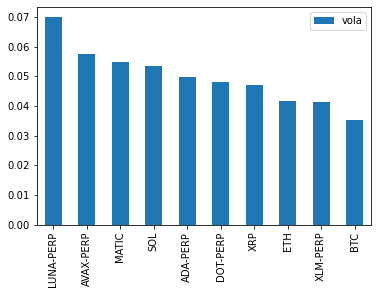

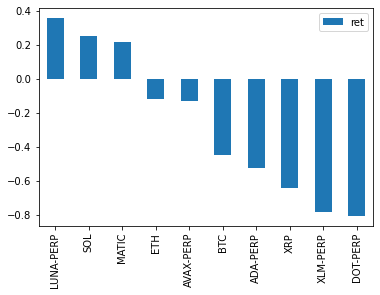

In [22]:
volatility.sort_values(volatility.columns[0],ascending=False).head(10).plot(kind='bar')
cum_ret.sort_values(cum_ret.columns[0],ascending=False).head(10).plot(kind='bar')


In [23]:
# ADD DATA TO DATAFRAME
df2 = pd.concat([cum_ret,volatility],axis=1)*100
df2= df2.reset_index().rename(columns={'index':'symbols'})
df2 =df2.sort_values('vola').tail(20)
print(f'Return Since {df1.shape[0]} Bars')
df2

Return Since 350 Bars


,symbols,ret,vola
1,BTC,-44.657061,3.518343
8,XLM-PERP,-78.442226,4.113774
0,ETH,-12.028752,4.159013
2,XRP,-63.988235,4.715372
7,DOT-PERP,-80.448354,4.794569
6,ADA-PERP,-52.568646,4.971992
3,SOL,25.184358,5.339100
9,MATIC,21.417720,5.474047
5,AVAX-PERP,-12.850174,5.742587
4,LUNA-PERP,35.765874,6.978492


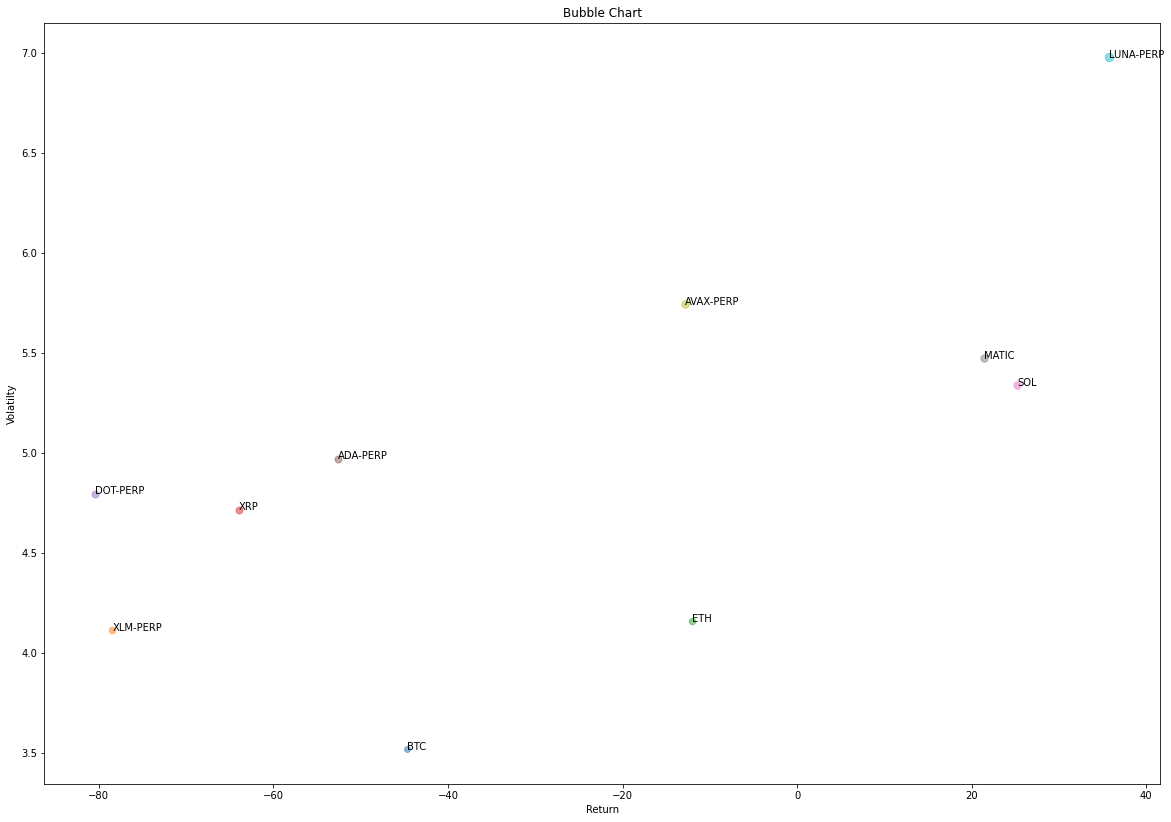

In [24]:
fig, ax = plt.subplots(figsize=(20,14))

for i, j in df2.iterrows():
    ax.scatter(j.ret, j.vola, alpha=0.5,s=j.vola*10)
    ax.annotate(j.symbols,(j.ret,j.vola))
#Plot title แกน x แกน y และ Set xlim และ ylim

plt.title('Bubble Chart')
plt.xlabel('Return')
plt.ylabel('Volatilty')

plt.show()

# Anlysis Market Beta - Alphas    [BTC benchmark]

In [25]:
from sklearn.linear_model import LinearRegression

def market_beta(X,Y,N):
    """ 
    X = The independent variable which is the Market
    Y = The dependent variable which is the Stock
    N = The length of the Window
     
    It returns the alphas and the betas of
    the rolling regression
    """
     
    # all the observations
    obs = len(X)
     
    # initiate the betas with null values
    betas = np.full(obs, np.nan)
     
    # initiate the alphas with null values
    alphas = np.full(obs, np.nan)
     
     
    for i in range((obs-N)):
        regressor = LinearRegression()
        regressor.fit(X.to_numpy()[i : i + N+1].reshape(-1,1), Y.to_numpy()[i : i + N+1])
         
        betas[i+N]  = regressor.coef_[0]
        alphas[i+N]  = regressor.intercept_
 
    return(alphas, betas)



In [28]:
pct_data

,ETH,BTC,XRP,SOL,LUNA-PERP,AVAX-PERP,ADA-PERP,DOT-PERP,XLM-PERP,MATIC
dates,,,,,,,,,,
2021-04-09T00:00:00.000Z,-0.007429,0.000241,-0.038246,0.024797,-0.008193,0.024071,-0.014013,-0.012208,-0.039827,0.029898
2021-04-10T00:00:00.000Z,0.032299,0.028268,0.299246,-0.032609,-0.009805,0.010208,0.013018,0.018329,0.147451,-0.024155
2021-04-11T00:00:00.000Z,0.007938,0.003524,-0.016147,0.040441,-0.026031,-0.006005,0.039617,-0.005686,0.038520,0.032580
2021-04-12T00:00:00.000Z,-0.006392,-0.002738,0.083399,0.021117,-0.031832,0.068698,0.037242,-0.020997,0.009804,-0.033511
2021-04-13T00:00:00.000Z,0.073871,0.061086,0.200748,-0.035568,0.066839,-0.004811,0.076354,0.061876,0.108704,0.166598
...,...,...,...,...,...,...,...,...,...,...
2022-03-19T00:00:00.000Z,0.004344,0.010737,0.028453,0.027633,0.039184,0.043418,0.058390,0.023836,0.039006,0.021299
2022-03-20T00:00:00.000Z,-0.031197,-0.022776,-0.017595,-0.041360,-0.016841,-0.054317,-0.027653,-0.039691,-0.016459,-0.043192
2022-03-21T00:00:00.000Z,0.009908,-0.006611,0.039013,-0.000226,0.055801,0.015957,0.043219,0.004868,0.032406,-0.000718


In [30]:
market_alphas = {}
market_betas = {}


for i in pct_data.columns:
    if ( i != 'BTC-PERP') | ( i != 'BTC') | ( i != 'BTC/USD'):
        a,b = market_beta(pct_data['BTC'],pct_data[i],30) # Becnchmark SET,SPY, BTC , VIX ,GOLD

        market_alphas[i] =(a)
        market_betas[i]= b  
        #         print(i,a[-1])

        # print(market_aplha['ETH-PERP'][0:50])

In [34]:

new_alpha=  pd.DataFrame(market_alphas).dropna()
datelist = pd.date_range(end =dt.today(), periods=len(new_alpha)).tolist() # Create Datetime to index
new_alpha['dates']=datelist
new_alpha.set_index('dates',inplace=True)
new_alpha.tail()

,ETH,BTC,XRP,SOL,LUNA-PERP,AVAX-PERP,ADA-PERP,DOT-PERP,XLM-PERP,MATIC
dates,,,,,,,,,,
2022-03-19 21:44:17.960698,-0.000688,6.505213e-19,0.000297,-0.001834,0.017708,-0.000686,-0.004758,0.000415,-0.001690,-0.004736
2022-03-20 21:44:17.960698,-0.000879,1.084202e-19,0.001110,-0.002379,0.018193,-0.001897,-0.005344,0.000399,-0.001288,-0.004584
2022-03-21 21:44:17.960698,0.000533,3.252607e-19,0.001517,-0.001325,0.019497,0.000111,-0.003369,0.000997,-0.000170,-0.003432
2022-03-22 21:44:17.960698,0.000729,2.168404e-19,-0.000703,-0.002190,0.017450,-0.002282,-0.002331,0.002567,-0.001104,-0.004177
2022-03-23 21:44:17.960698,0.001510,-8.673617e-19,0.000025,-0.002172,0.017353,0.000107,0.001622,0.003877,-0.000231,-0.002145


In [36]:

new_beta=  pd.DataFrame(market_betas).dropna()
datelist = pd.date_range(end =dt.today(), periods=len(new_beta)).tolist()
new_beta['date']=datelist
# new_beta['date'] = pct_data.index
new_beta.date =new_beta.date.dt.strftime('%Y-%m-%d')
new_beta.set_index('date',inplace=True)
new_beta.tail()

,ETH,BTC,XRP,SOL,LUNA-PERP,AVAX-PERP,ADA-PERP,DOT-PERP,XLM-PERP,MATIC
date,,,,,,,,,,
2022-03-19,0.908217,1.0,0.776921,1.068631,1.347010,1.051867,0.889848,0.819605,0.891553,0.927170
2022-03-20,0.906691,1.0,0.739569,1.077621,1.320823,1.076193,0.913867,0.797984,0.878978,0.902146
2022-03-21,0.897173,1.0,0.741638,1.070101,1.315945,1.062799,0.904500,0.794286,0.874766,0.893884
2022-03-22,0.895738,1.0,0.725733,1.062422,1.263754,1.026589,0.924569,0.822357,0.867044,0.895056
2022-03-23,0.881974,1.0,0.704342,1.096823,1.275795,0.981282,0.894375,0.802221,0.857331,0.862425


In [39]:
## Concat
mean_alpha =  pd.DataFrame(new_alpha.mean() ,columns=['means'])
# re_alpha.columns = 'mean_alpha'
mean_alpha = mean_alpha.sort_values(by='means',ascending=False)
alpha= new_alpha.tail(1).T  ### Transpose Dataframe 
alpha.columns =['alpha'] ## Rename columns

mean_betas=  pd.DataFrame(new_beta.mean() ,columns=['means_beta'])
# re_alpha.columns = 'mean_alpha'
mean_betas = mean_betas.sort_values(by='means_beta',ascending=False)
betas= new_beta.tail(1).T  ### Transpose Dataframe 
betas.columns =['beta'] ## Rename columns

In [41]:
mean_betas

,means_beta
MATIC,1.386957
DOT-PERP,1.283343
AVAX-PERP,1.191805
XRP,1.120071
XLM-PERP,1.102655
LUNA-PERP,1.091176
ETH,1.074242
ADA-PERP,1.033193
BTC,1.000000
SOL,0.988515


In [50]:

rank_df  =  pd.concat([alpha,mean_alpha,betas,mean_betas],axis=1)


# rank_df.columns= ['now_alpha','mean_alpha']
rank_df['ranking_alpha'] =  rank_df['means'].sort_values(ascending=False).rank(method='max',ascending=False)
rank_df['ranking_beta'] =  rank_df['means_beta'].sort_values(ascending=False).rank(method='max',ascending=False)

# rank_df.columns = ['n_score','mean_alpha','rank']

rank_df.sort_values(by='beta',ascending=False)

,alpha,means,beta,means_beta,ranking_alpha,ranking_beta
LUNA-PERP,1.735261e-02,9.476407e-03,1.275795,1.091176,1.0,6.0
SOL,-2.171748e-03,5.709328e-03,1.096823,0.988515,4.0,10.0
BTC,-8.673617e-19,-4.847471e-20,1.000000,1.000000,9.0,9.0
AVAX-PERP,1.070758e-04,6.456284e-03,0.981282,1.191805,2.0,3.0
ADA-PERP,1.622285e-03,1.311829e-03,0.894375,1.033193,6.0,8.0
ETH,1.509967e-03,2.125561e-03,0.881974,1.074242,5.0,7.0
MATIC,-2.144694e-03,5.814971e-03,0.862425,1.386957,3.0,1.0
XLM-PERP,-2.308226e-04,-9.316461e-04,0.857331,1.102655,10.0,5.0
DOT-PERP,3.877133e-03,7.853364e-04,0.802221,1.283343,7.0,2.0
XRP,2.525071e-05,5.012278e-04,0.704342,1.120071,8.0,4.0


In [44]:
rank_df =rank_df.sort_values(by='ranking_beta')
rank_df = rank_df.head(100)
for i in rank_df.index: ### Loop all symbols 
    # Request data volumns info to concat dataframe
    try:
        volume = float(ex.fetch_ticker(i)['info']['volumeUsd24h'])
    except ccxt.BadSymbol as e :
        print(str(e))
        name_spot = i.split('-')[0]+'/USD'
        volume = float(ex.fetch_ticker(name_spot)['info']['volumeUsd24h'])
        print(name_spot, 'Edit Token')
    rank_df.loc[rank_df.index==i,'volume'] = volume
rank_df['volume_m'] = rank_df['volume']/1000000 # Milions 


ftx does not have market symbol MATIC
MATIC/USD Edit Token
ftx does not have market symbol XRP
XRP/USD Edit Token
ftx does not have market symbol ETH
ETH/USD Edit Token
ftx does not have market symbol BTC
BTC/USD Edit Token
ftx does not have market symbol SOL
SOL/USD Edit Token


In [47]:
# Filter Volume Grethan than 50M 
highcap_df = rank_df[['ranking_beta','beta','means_beta','volume_m']][rank_df['volume_m']>=50] #
highcap_df.drop(columns='ranking_beta',inplace=True)
highcap_df['rank']=highcap_df['volume_m'].rank(method='max',ascending=False) # Rerank
highcap_df =highcap_df.sort_values(by='rank').head(20)

## add 


## addidtion filter week , month ,returns 

,beta,means_beta,volume_m,rank
BTC,1.000000,1.000000,400.527707,1.0
ETH,0.881974,1.074242,358.817099,2.0
AVAX-PERP,0.981282,1.191805,239.930899,3.0
LUNA-PERP,1.275795,1.091176,238.085734,4.0
ADA-PERP,0.894375,1.033193,170.519353,5.0
DOT-PERP,0.802221,1.283343,94.832018,6.0
SOL,1.096823,0.988515,51.650085,7.0


In [51]:
pct_list = [] 
# Calculate Cumalative Returns
cum_pct = (pct_data+1).cumprod()-1
last_cum_pct = cum_pct[-1:]
last_cum_pct =last_cum_pct.T
for i in highcap_df.index: 
    pct = last_cum_pct[last_cum_pct.index==i].values[0][0] ### Last 300 Bars
    pct_list.append(pct)
highcap_df['gain'] = pct_list
## Easy Way to Measure Performance Stock
highcap_df['cond'] = highcap_df.apply(lambda x: 'lag'if  x['means_beta'] > x['beta'] else 'lead',axis=1)
highcap_df


,beta,means_beta,volume_m,rank,gain,cond
BTC,1.000000,1.000000,400.527707,1.0,-0.446571,lead
ETH,0.881974,1.074242,358.817099,2.0,-0.120288,lag
AVAX-PERP,0.981282,1.191805,239.930899,3.0,-0.128502,lag
LUNA-PERP,1.275795,1.091176,238.085734,4.0,0.357659,lead
ADA-PERP,0.894375,1.033193,170.519353,5.0,-0.525686,lag
DOT-PERP,0.802221,1.283343,94.832018,6.0,-0.804484,lag
SOL,1.096823,0.988515,51.650085,7.0,0.251844,lead


In [52]:
pct_data

,ETH,BTC,XRP,SOL,LUNA-PERP,AVAX-PERP,ADA-PERP,DOT-PERP,XLM-PERP,MATIC
dates,,,,,,,,,,
2021-04-09T00:00:00.000Z,-0.007429,0.000241,-0.038246,0.024797,-0.008193,0.024071,-0.014013,-0.012208,-0.039827,0.029898
2021-04-10T00:00:00.000Z,0.032299,0.028268,0.299246,-0.032609,-0.009805,0.010208,0.013018,0.018329,0.147451,-0.024155
2021-04-11T00:00:00.000Z,0.007938,0.003524,-0.016147,0.040441,-0.026031,-0.006005,0.039617,-0.005686,0.038520,0.032580
2021-04-12T00:00:00.000Z,-0.006392,-0.002738,0.083399,0.021117,-0.031832,0.068698,0.037242,-0.020997,0.009804,-0.033511
2021-04-13T00:00:00.000Z,0.073871,0.061086,0.200748,-0.035568,0.066839,-0.004811,0.076354,0.061876,0.108704,0.166598
...,...,...,...,...,...,...,...,...,...,...
2022-03-19T00:00:00.000Z,0.004344,0.010737,0.028453,0.027633,0.039184,0.043418,0.058390,0.023836,0.039006,0.021299
2022-03-20T00:00:00.000Z,-0.031197,-0.022776,-0.017595,-0.041360,-0.016841,-0.054317,-0.027653,-0.039691,-0.016459,-0.043192
2022-03-21T00:00:00.000Z,0.009908,-0.006611,0.039013,-0.000226,0.055801,0.015957,0.043219,0.004868,0.032406,-0.000718


# Single Symbols View

In [267]:
filter_symbol = 'ADA-PERP'


price_filter = data[[filter_symbol]]
alpha_filter = new_alpha[[filter_symbol]]

price_filter.index= pd.to_datetime(price_filter.index)
price_filter.index = price_filter.index.strftime('%Y-%m-%d')
alpha_filter.index= pd.to_datetime(alpha_filter.index,format='%Y-%m-%d')
alpha_filter.index = alpha_filter.index.strftime('%Y-%m-%d')


In [268]:
df2= pd.concat([price_filter,alpha_filter],axis=1).dropna()
df2.columns = ['price','alpha']
df2

,price,alpha
dates,,
2021-12-24,1.394000,-0.002521
2021-12-25,1.454750,0.000512
2021-12-26,1.455955,0.001345
2021-12-27,1.517115,0.002077
2021-12-28,1.399315,0.002740
...,...,...
2022-02-26,0.887380,-0.008224
2022-02-27,0.856935,-0.006776
2022-02-28,0.962610,-0.006985


No handles with labels found to put in legend.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


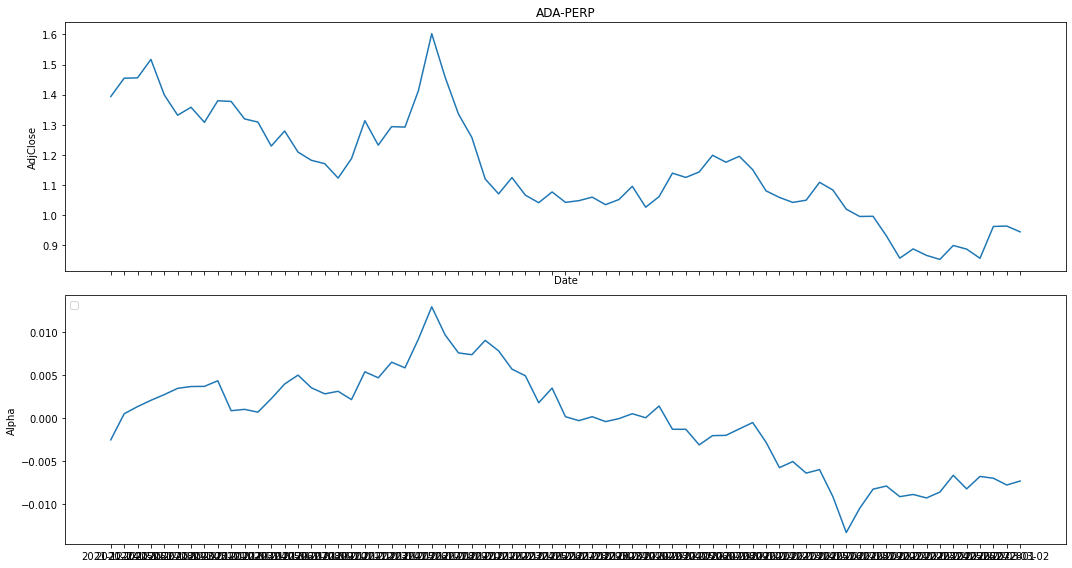

In [270]:
fig , ax = plt.subplots(2, 1, sharex=True, figsize=(15, 8))
ax[0].plot(df2.index,df2.price)
ax[0].set_xlabel('Date')
ax[0].set_ylabel('AdjClose')
ax[0].title.set_text(f'{filter_symbol}')

ax[1].plot(df2.index,df2.alpha)
ax[1].set_ylabel('Alpha')
plt.legend(loc='upper left')

fig.tight_layout()

fig.show()
fig.savefig(f'{i}.pdf',bbox_inches='tight',dpi=100)


In [289]:
highcap_df

,beta,means_beta,volume_m,rank,gain
LUNA-PERP,1.229454,1.392351,672.021353,1.0,0.638677
SOL-PERP,1.186457,1.366508,631.809884,2.0,-0.611223
AVAX-PERP,1.314501,1.506840,297.183837,3.0,-0.459299
FTM-PERP,1.163735,1.516015,251.437917,4.0,-0.349719
NEAR-PERP,1.415179,1.462930,175.081457,5.0,-0.208942
DOT-PERP,0.883413,1.403538,117.456714,6.0,-0.607014
ADA-PERP,0.958049,1.208397,108.885723,7.0,-0.531348
ATOM-PERP,1.011030,1.284481,108.297138,8.0,-0.272244
MATIC-PERP,1.190978,1.500943,106.100390,9.0,-0.254987
SAND-PERP,1.220450,1.481330,88.734323,10.0,-0.525254


No handles with labels found to put in legend.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
No handles with labels found to put in legend.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
No handles with labels found to put in legend.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
No handles with labels found to put in legend.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot s

KeyboardInterrupt: 

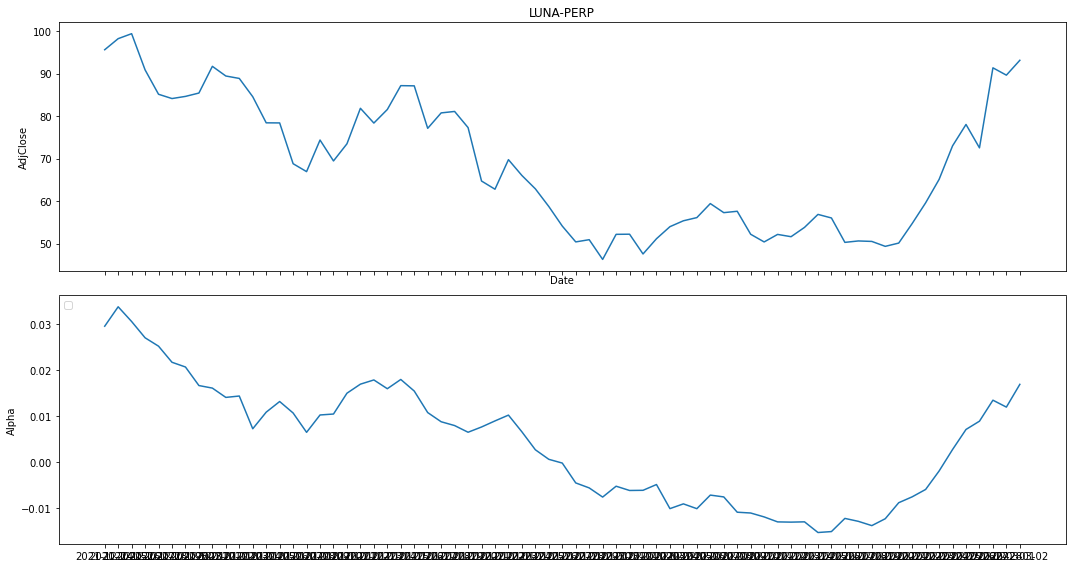

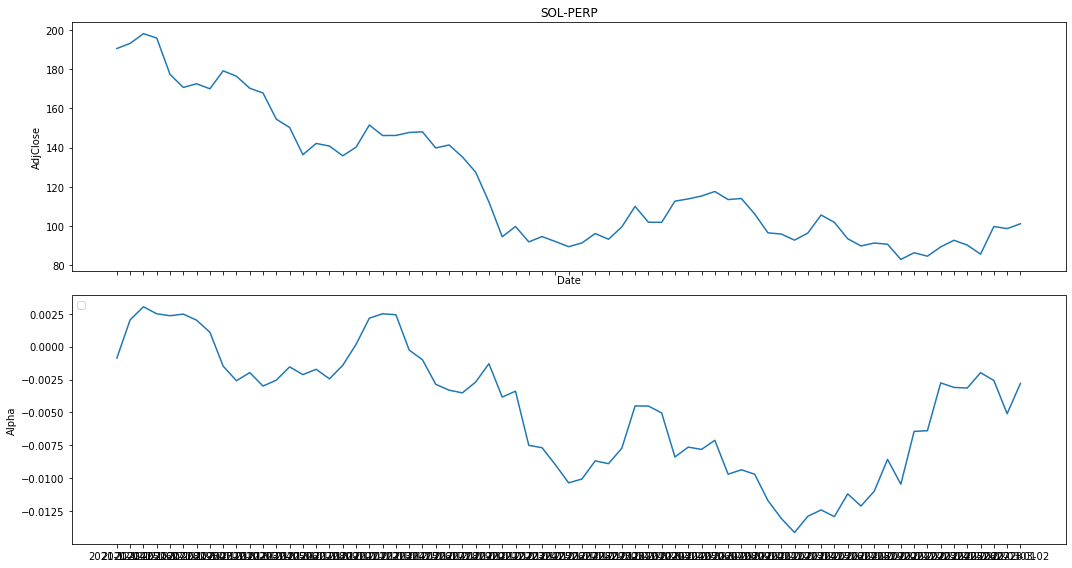

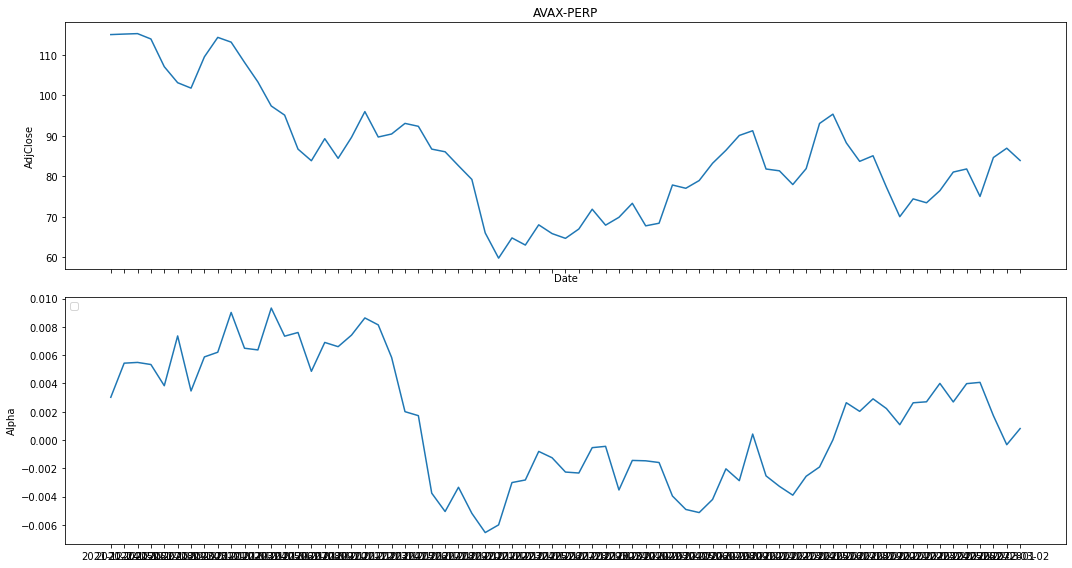

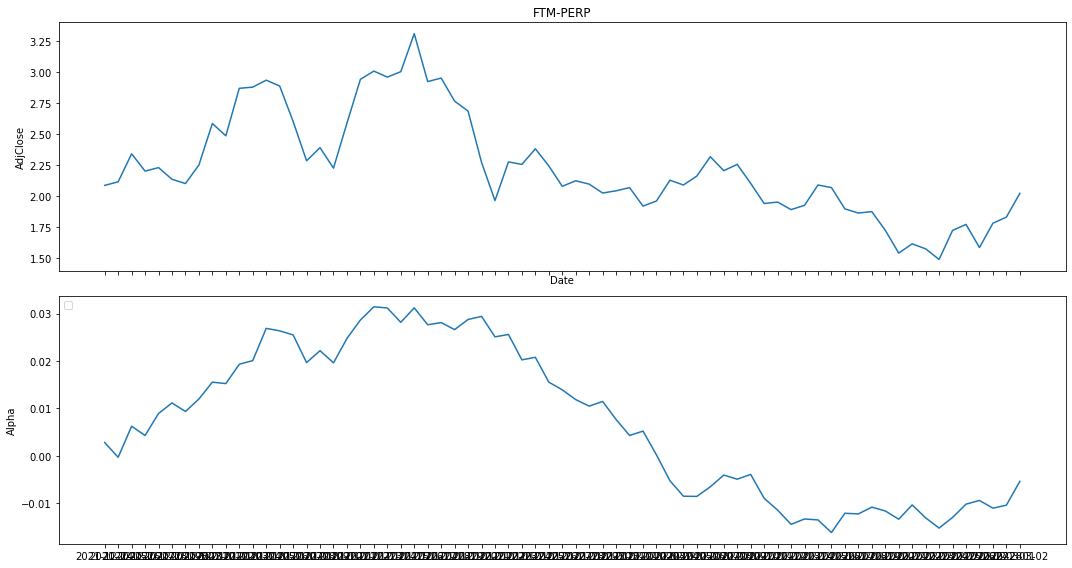

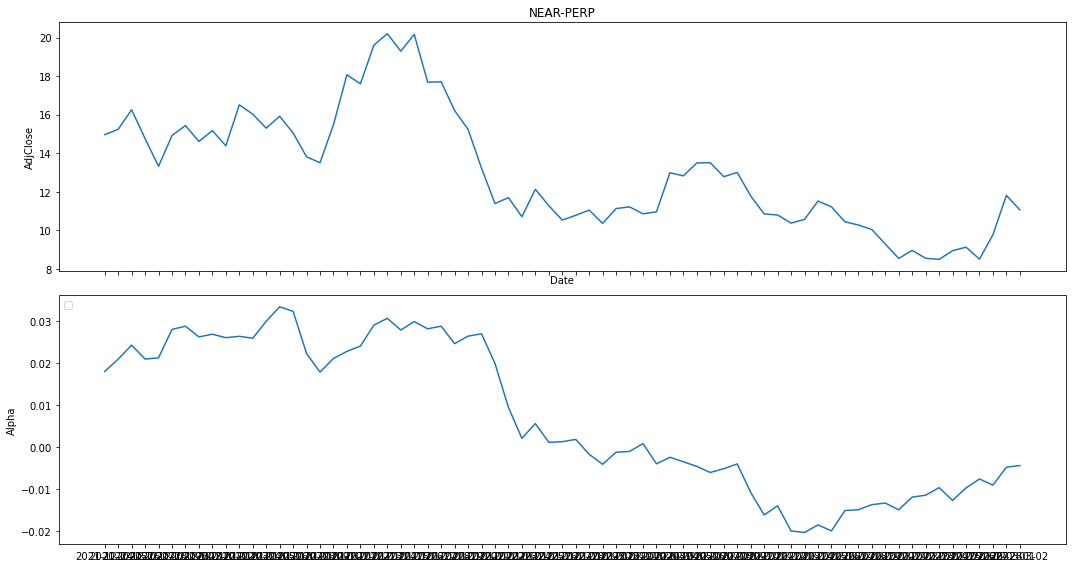

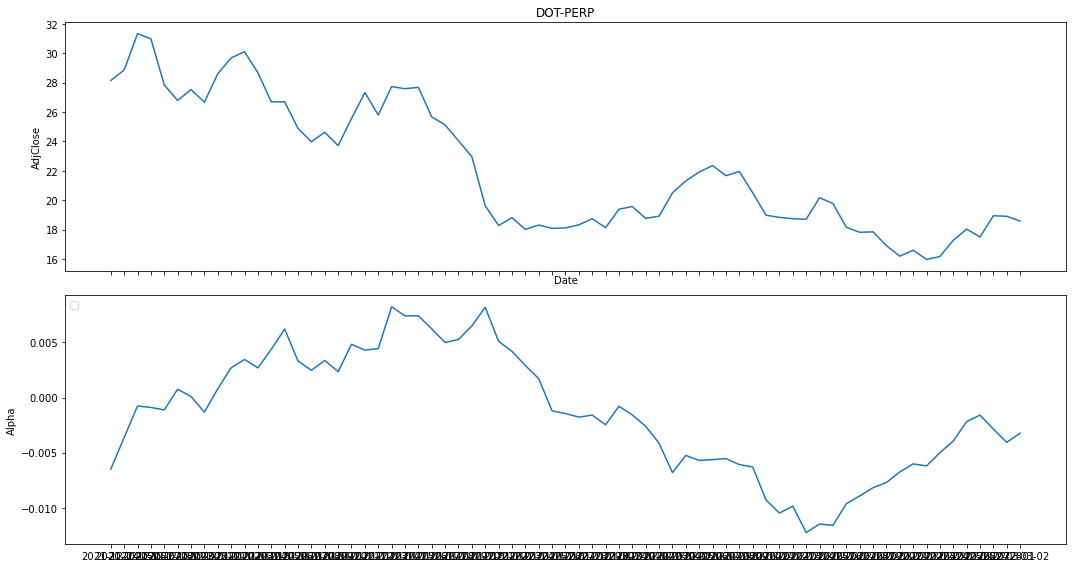

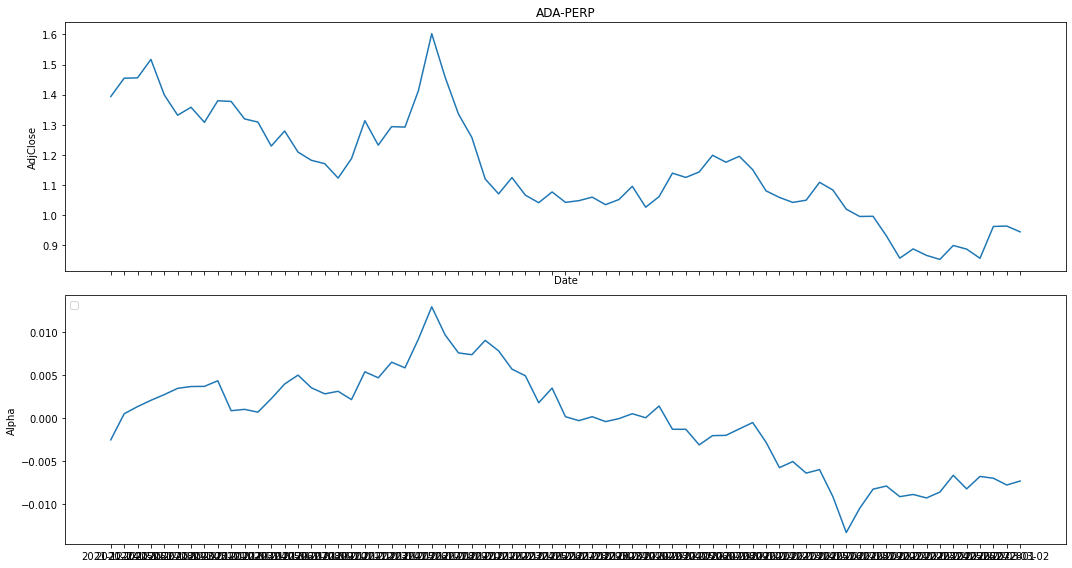

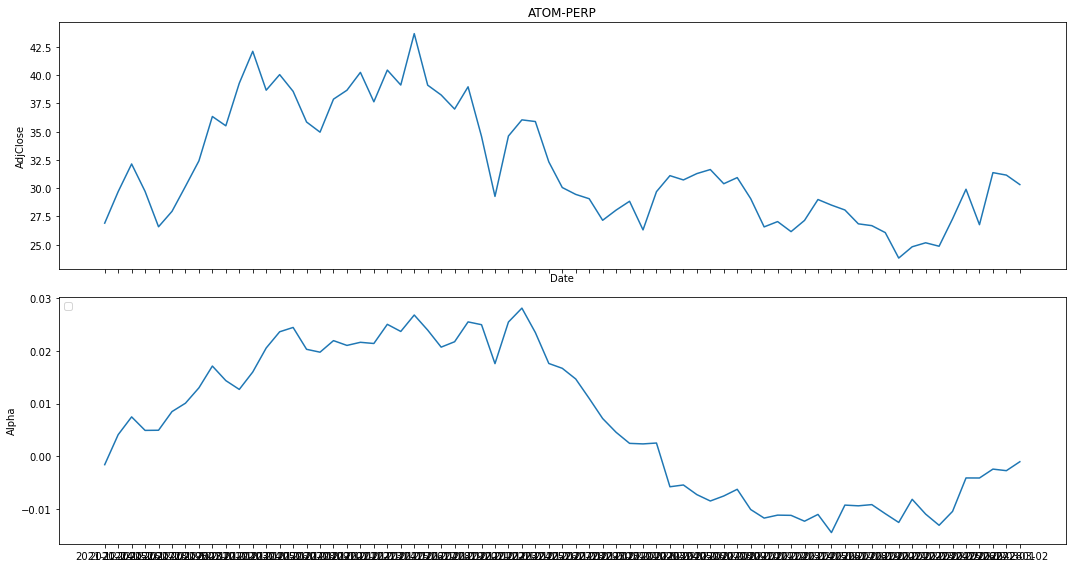

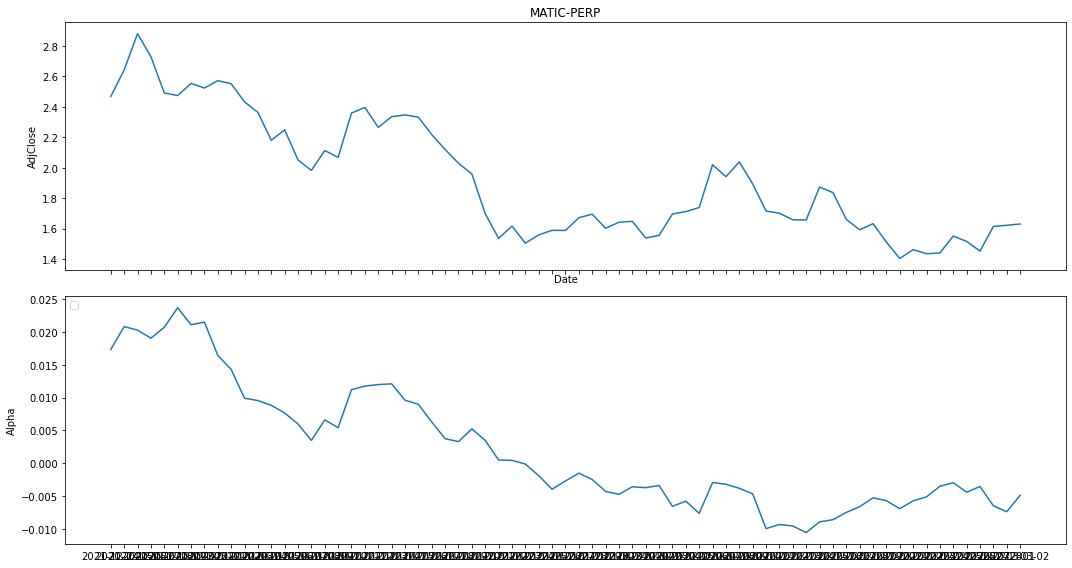

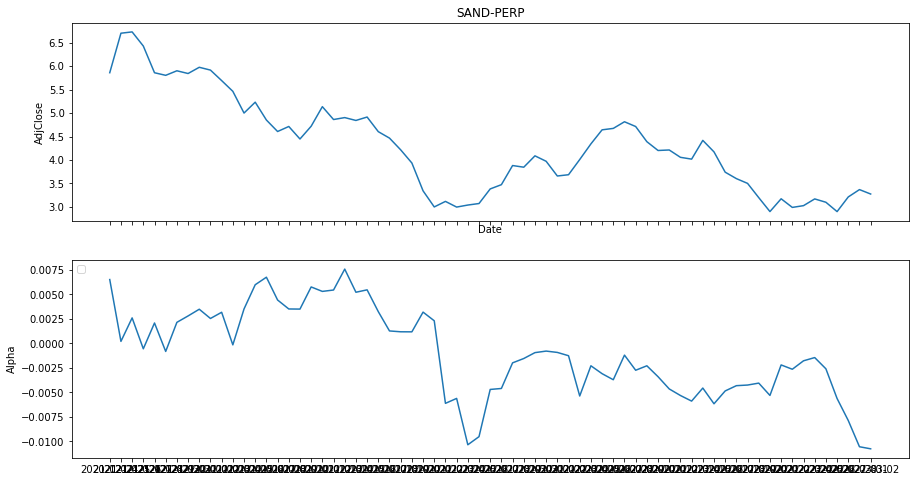

In [288]:
for i in highcap_df.index:
    price_filter = data[[i]]
    alpha_filter = new_alpha[[i]]
    price_filter.index= pd.to_datetime(price_filter.index)
    price_filter.index = price_filter.index.strftime('%Y-%m-%d')

    alpha_filter.index= pd.to_datetime(alpha_filter.index)
    alpha_filter.index = alpha_filter.index.strftime('%Y-%m-%d')

    df2= pd.concat([price_filter,alpha_filter],axis=1).dropna()
    df2.columns = ['price','alpha']
    
## Plot Code
    fig , ax = plt.subplots(2, 1, sharex=True, figsize=(15, 8))
    ax[0].plot(df2.index,df2.price)
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('AdjClose')
    ax[0].title.set_text(f'{i}')

    ax[1].plot(df2.index,df2.alpha)
    ax[1].set_ylabel('Alpha')
    plt.legend(loc='upper left')

    fig.tight_layout()
    fig.show()
    fig.savefig(f'{i}.png',bbox_inches='tight',dpi=100)


,beta,means_beta,volume_m,rank,gain,cond
LUNA-PERP,1.229454,1.392351,672.021353,1.0,0.638677,lag
SOL-PERP,1.186457,1.366508,631.809884,2.0,-0.611223,lag
AVAX-PERP,1.314501,1.506840,297.183837,3.0,-0.459299,lag
FTM-PERP,1.163735,1.516015,251.437917,4.0,-0.349719,lag
NEAR-PERP,1.415179,1.462930,175.081457,5.0,-0.208942,lag
DOT-PERP,0.883413,1.403538,117.456714,6.0,-0.607014,lag
ADA-PERP,0.958049,1.208397,108.885723,7.0,-0.531348,lag
ATOM-PERP,1.011030,1.284481,108.297138,8.0,-0.272244,lag
MATIC-PERP,1.190978,1.500943,106.100390,9.0,-0.254987,lag
SAND-PERP,1.220450,1.481330,88.734323,10.0,-0.525254,lag


# Cumulative Return  Defind Momentum of stock

<AxesSubplot:xlabel='dates'>

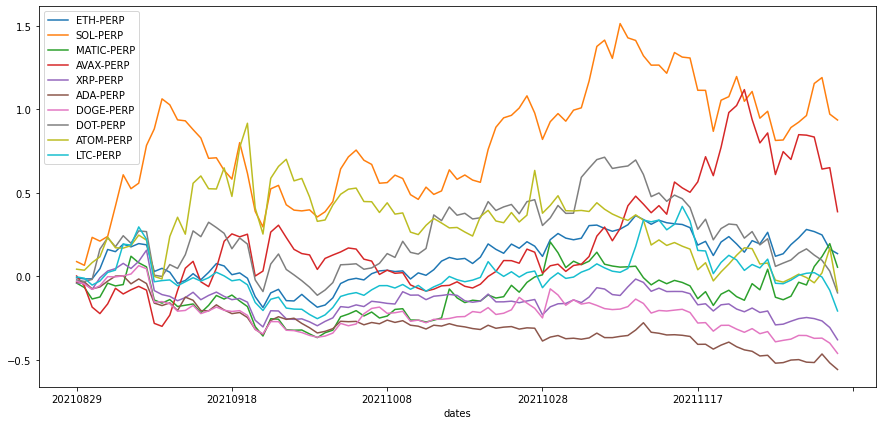

In [96]:


list_highcap =highcap_index.index
cum_pct[list_highcap].plot(figsize=(15,7))

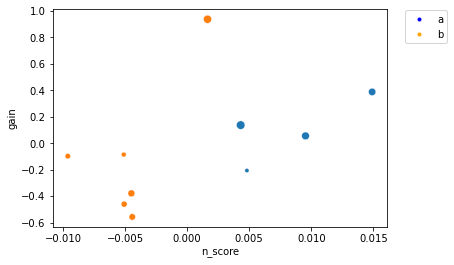

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

custom = [Line2D([], [], marker='.', color='b', linestyle='None'),
          Line2D([], [], marker='.', color='orange', linestyle='None')]

sns.scatterplot(data=highcap_index,x='n_score',y='gain',size=highcap_index.index,hue=highcap_index.cond)
legend =plt.legend(custom,['a','b'],bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.1)
frame = legend.get_frame()
frame.set_facecolor('white')
plt.show()


## show symbols name ###  Gains Score ,

In [100]:
# data = Data All symbols list 
## High cap index returns 
rolling_return =(data[list_highcap] /data[list_highcap].shift(100))-1
# rolling_return=rolling_return.dropna()
rolling_return

,ETH-PERP,SOL-PERP,MATIC-PERP,AVAX-PERP,XRP-PERP,ADA-PERP,DOGE-PERP,DOT-PERP,ATOM-PERP,LTC-PERP
dates,,,,,,,,,,
2021-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='Density'>

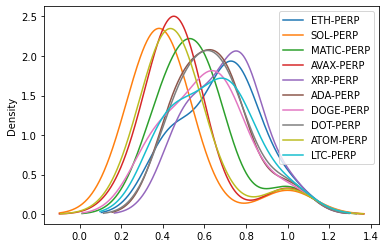

In [114]:
 pct_data[list_highcap].corr().plot.kde()

In [53]:
##    Correlation  on BTC  Last 60 days ###
# corr_d= pct_data[list_highcap].rolling(60).corr()

corr_d =pct_data[list_highcap].corr()
corr_d.dropna(inplace=True)
corr_d.plot.kde(figsize=(15,7))
corr_d['ETH-']

NameError: name 'list_highcap' is not defined

In [118]:
list_highcap

Index(['ETH-PERP', 'SOL-PERP', 'MATIC-PERP', 'AVAX-PERP', 'XRP-PERP',
       'ADA-PERP', 'DOGE-PERP', 'DOT-PERP', 'ATOM-PERP', 'LTC-PERP'],
      dtype='object')

In [78]:
list_highcaps =list_highcap.tolist()
list_highcaps.append('BTC-PERP')

In [79]:
pct_data[list_highcaps]

,ETH-PERP,SOL-PERP,MATIC-PERP,AVAX-PERP,XRP-PERP,ADA-PERP,DOGE-PERP,DOT-PERP,ATOM-PERP,LTC-PERP,BTC-PERP
dates,,,,,,,,,,,
20210828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210829,0.991335,1.092426,0.960562,1.002109,0.961997,0.965776,0.971383,0.979197,1.043845,0.996316,0.997088
20210830,0.993413,0.979641,0.972679,0.942516,0.995925,1.001619,0.982697,0.990339,0.994244,0.992662,0.996916
20210831,1.000465,1.170104,0.929017,0.874018,0.963944,0.957864,0.967204,1.012864,1.044976,0.959198,0.962795
20210901,1.063052,0.982035,1.013811,0.953455,1.077827,1.012489,1.023796,1.202671,1.032500,1.025989,1.003234
...,...,...,...,...,...,...,...,...,...,...,...
20211201,1.041276,1.020857,0.983183,0.998459,1.009010,0.970162,0.998850,1.022484,0.980209,1.011812,0.985631
20211202,0.990182,1.102607,1.123458,0.993917,0.991421,0.995223,0.974238,0.968582,0.968762,1.003795,1.003789
20211203,0.984309,1.016660,1.057979,0.900680,0.981482,1.111776,1.001985,0.972403,1.063686,0.974587,0.987836


<AxesSubplot:title={'center':'20210828 - 20211205'}>

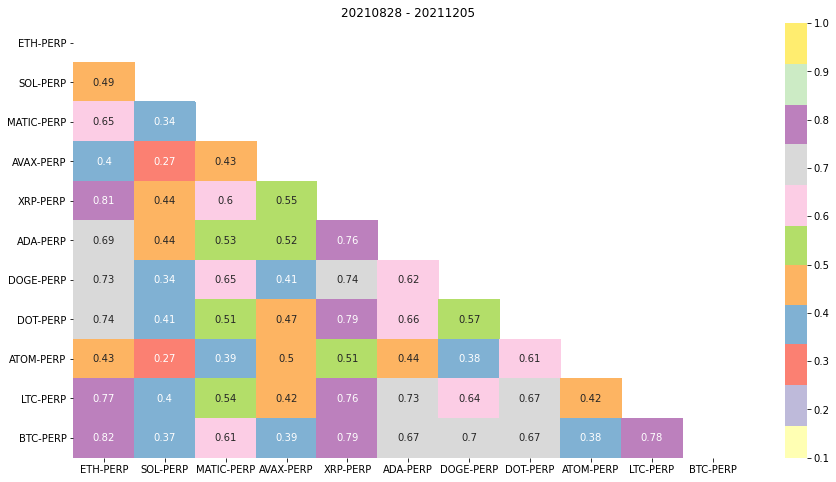

In [80]:
matrix = np.triu(pct_data[list_highcaps].corr())
plt.figure(figsize=(15,8))
plt.title(f'{pct_data.index[0]} - {pct_data.index[-1]}')
corr = pct_data[list_highcaps].corr()
sns.heatmap(corr, annot = True, fmt='.2g', vmin=0.1, vmax=1, center= 0.5, cmap= 'Set3', mask=matrix)


In [81]:
(pct_data[list_highcaps].corr())

,ETH-PERP,SOL-PERP,MATIC-PERP,AVAX-PERP,XRP-PERP,ADA-PERP,DOGE-PERP,DOT-PERP,ATOM-PERP,LTC-PERP,BTC-PERP
ETH-PERP,1.000000,0.489462,0.651836,0.402975,0.813529,0.687722,0.731902,0.743229,0.430021,0.773943,0.815500
SOL-PERP,0.489462,1.000000,0.341270,0.268651,0.444739,0.444138,0.341837,0.409723,0.271954,0.398467,0.371554
MATIC-PERP,0.651836,0.341270,1.000000,0.434536,0.599676,0.527589,0.646065,0.507020,0.392048,0.539375,0.609066
AVAX-PERP,0.402975,0.268651,0.434536,1.000000,0.554795,0.519069,0.411841,0.468640,0.499390,0.424801,0.394165
XRP-PERP,0.813529,0.444739,0.599676,0.554795,1.000000,0.761296,0.742332,0.785361,0.510280,0.763622,0.788993
ADA-PERP,0.687722,0.444138,0.527589,0.519069,0.761296,1.000000,0.621552,0.664577,0.437734,0.727468,0.673268
DOGE-PERP,0.731902,0.341837,0.646065,0.411841,0.742332,0.621552,1.000000,0.568553,0.377279,0.644997,0.701100
DOT-PERP,0.743229,0.409723,0.507020,0.468640,0.785361,0.664577,0.568553,1.000000,0.605809,0.674784,0.673682
ATOM-PERP,0.430021,0.271954,0.392048,0.499390,0.510280,0.437734,0.377279,0.605809,1.000000,0.420191,0.382781
LTC-PERP,0.773943,0.398467,0.539375,0.424801,0.763622,0.727468,0.644997,0.674784,0.420191,1.000000,0.784953


In [82]:
pct_data[list_highcaps]

,ETH-PERP,SOL-PERP,MATIC-PERP,AVAX-PERP,XRP-PERP,ADA-PERP,DOGE-PERP,DOT-PERP,ATOM-PERP,LTC-PERP,BTC-PERP
dates,,,,,,,,,,,
20210828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210829,0.991335,1.092426,0.960562,1.002109,0.961997,0.965776,0.971383,0.979197,1.043845,0.996316,0.997088
20210830,0.993413,0.979641,0.972679,0.942516,0.995925,1.001619,0.982697,0.990339,0.994244,0.992662,0.996916
20210831,1.000465,1.170104,0.929017,0.874018,0.963944,0.957864,0.967204,1.012864,1.044976,0.959198,0.962795
20210901,1.063052,0.982035,1.013811,0.953455,1.077827,1.012489,1.023796,1.202671,1.032500,1.025989,1.003234
...,...,...,...,...,...,...,...,...,...,...,...
20211201,1.041276,1.020857,0.983183,0.998459,1.009010,0.970162,0.998850,1.022484,0.980209,1.011812,0.985631
20211202,0.990182,1.102607,1.123458,0.993917,0.991421,0.995223,0.974238,0.968582,0.968762,1.003795,1.003789
20211203,0.984309,1.016660,1.057979,0.900680,0.981482,1.111776,1.001985,0.972403,1.063686,0.974587,0.987836


In [83]:
btc_corr=pd.Series(corr_d['SOL-PERP'],name='BTC')
btc_corr =pd.DataFrame(btc_corr)


btc_corr = btc_corr.reset_index()
# print(btc_corr)
filter_corr =btc_corr.pivot(index="dates", columns="level_1", values="BTC")
filter_corr

level_1,ADA-PERP,ATOM-PERP,AVAX-PERP,DOGE-PERP,DOT-PERP,ETH-PERP,LTC-PERP,MATIC-PERP,SOL-PERP,XRP-PERP
dates,,,,,,,,,,
20211027,0.376900,0.225490,0.177505,0.259800,0.307640,0.403459,0.336166,0.257034,1.0,0.350403
20211028,0.422976,0.249625,0.205581,0.296276,0.341965,0.428149,0.367027,0.266133,1.0,0.396387
20211029,0.431252,0.249861,0.204577,0.287647,0.342823,0.433511,0.373295,0.274939,1.0,0.403702
20211030,0.487789,0.249617,0.286658,0.321268,0.357561,0.457584,0.425140,0.327531,1.0,0.452066
20211031,0.494775,0.256157,0.286893,0.330641,0.405311,0.475334,0.432914,0.334035,1.0,0.472467
20211101,0.496936,0.254550,0.287618,0.332849,0.404323,0.489917,0.433888,0.336299,1.0,0.474510
20211102,0.487667,0.289933,0.250137,0.347684,0.429416,0.522335,0.442568,0.363040,1.0,0.483135
20211103,0.500951,0.298499,0.286106,0.355858,0.424616,0.528005,0.384161,0.374465,1.0,0.487733
20211104,0.507496,0.302087,0.315282,0.347392,0.418817,0.517084,0.392633,0.448829,1.0,0.499908


In [84]:
filter_corr[['ETH-PERP','ADA-PERP','BNB-PERP']].plot()

KeyError: "['BNB-PERP'] not in index"

In [85]:
ma = filter_corr.rolling(20).mean()

mstd = filter_corr.rolling(20).std()

ma_m = (ma - 2 * mstd)
ma_p = (ma + 2 * mstd)
ma_m

level_1,ADA-PERP,ATOM-PERP,AVAX-PERP,DOGE-PERP,DOT-PERP,ETH-PERP,LTC-PERP,MATIC-PERP,SOL-PERP,XRP-PERP
dates,,,,,,,,,,
20211027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20211028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20211029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20211030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20211031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20211101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20211102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20211103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20211104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
mstd.iloc[20:]
# (filter_corr['ETH'].iloc[20:])


level_1,ADA-PERP,ATOM-PERP,AVAX-PERP,DOGE-PERP,DOT-PERP,ETH-PERP,LTC-PERP,MATIC-PERP,SOL-PERP,XRP-PERP
dates,,,,,,,,,,
20211116,0.075061,0.109741,0.138336,0.059504,0.097974,0.078341,0.067353,0.115906,5.586240e-14,0.079703
20211117,0.070894,0.112861,0.138871,0.057874,0.096917,0.075320,0.063968,0.110032,5.604304e-14,0.075293
20211118,0.066593,0.110601,0.138156,0.055093,0.093385,0.072347,0.060789,0.105509,5.586785e-14,0.070791
20211119,0.066045,0.110911,0.142546,0.054990,0.089987,0.070542,0.061396,0.103890,5.611357e-14,0.069691
20211120,0.063606,0.106632,0.142411,0.052466,0.086705,0.067006,0.060925,0.098474,5.821964e-14,0.066916
20211121,0.059714,0.099469,0.139612,0.048628,0.081417,0.062310,0.059985,0.089350,6.484022e-14,0.062591
20211122,0.057132,0.094687,0.126946,0.045922,0.076871,0.058228,0.059915,0.077463,6.688978e-14,0.059778
20211123,0.054875,0.091640,0.114647,0.043462,0.070879,0.053862,0.055520,0.063464,6.157318e-14,0.056964
20211124,0.053575,0.087533,0.103242,0.041202,0.063851,0.048209,0.052179,0.056555,6.107101e-14,0.056553
